In [1]:
library(ggplot2)

In [2]:
theme_stg = theme(text=element_text(size=18))

options(repr.plot.height=4)

#### Discrete Scale

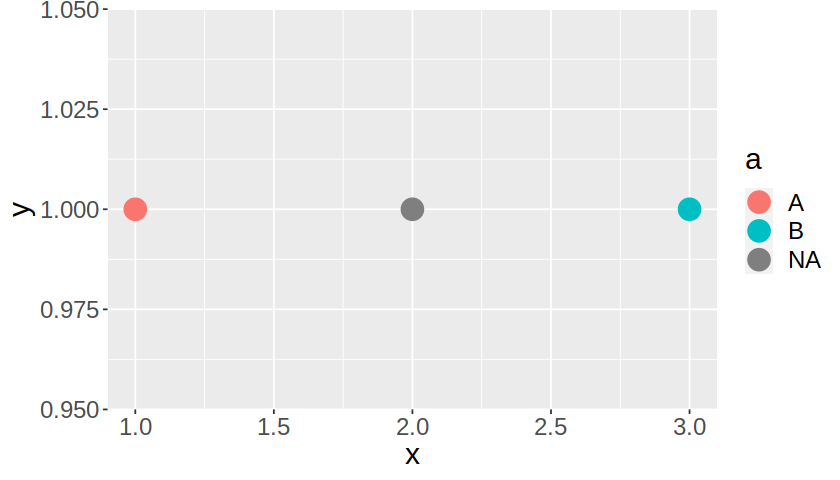

In [3]:
p1 <- ggplot(data = data.frame(x = c(1,2,3), y = c(1,1,1), a = c("A",NA, "B")), aes(x, y, color = a)) + 
        geom_point(size = 6) + 
        theme_stg
p1

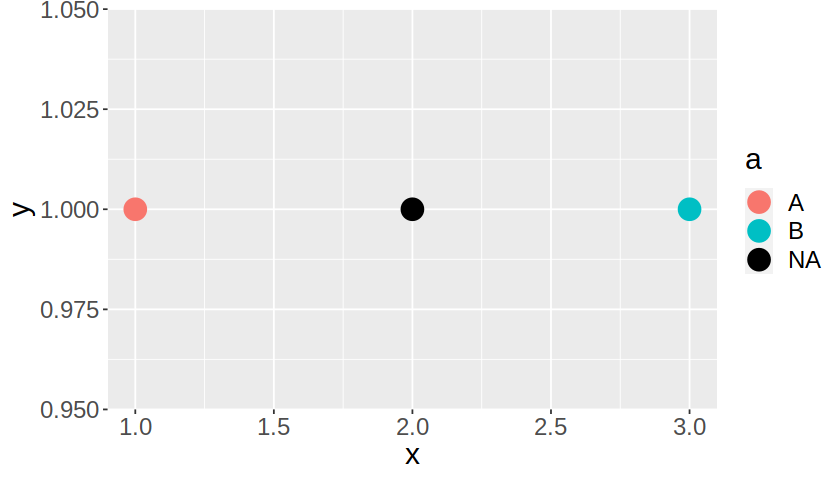

In [4]:
p1 + scale_color_discrete(na.value="black")

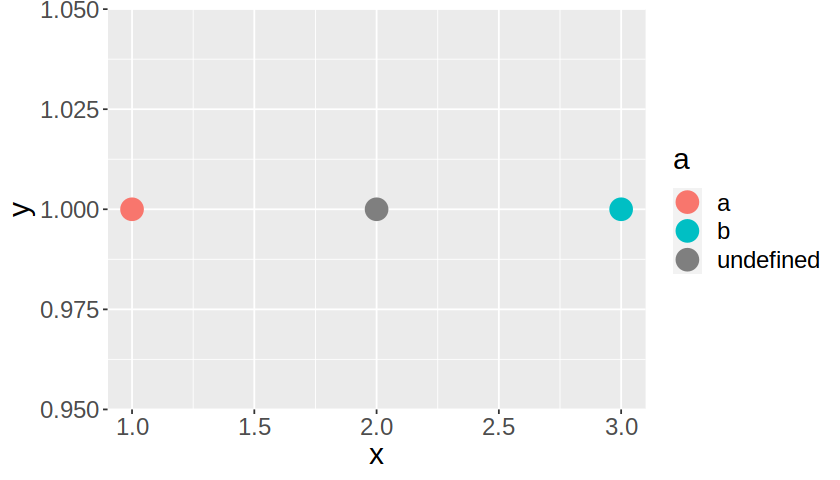

In [5]:
p1 + scale_color_discrete(labels = c("a", "b", "undefined"))

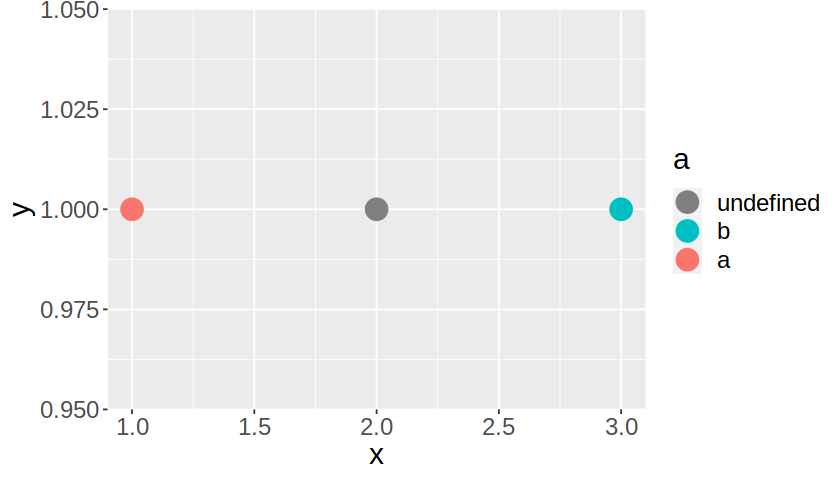

In [6]:
p1 + scale_color_discrete(breaks = c(NA, "B", "A"), labels = c("undefined", "b", "a"))

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


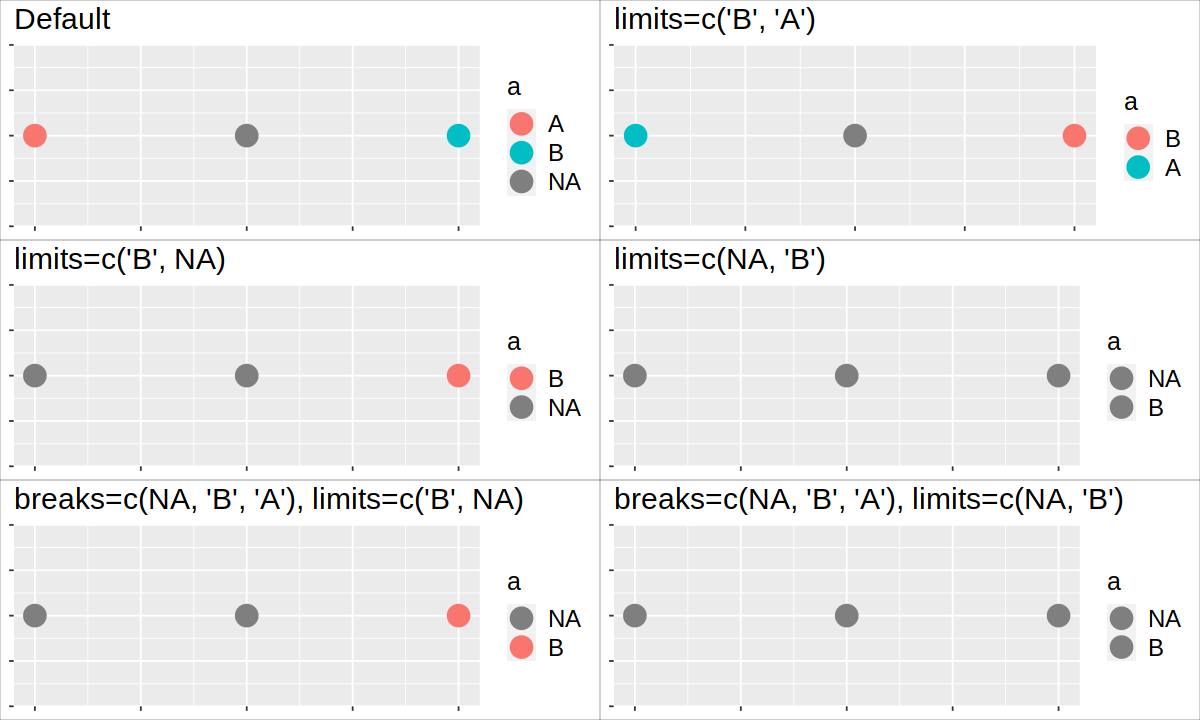

In [7]:
library(ggplot2)
library(gridExtra)
options(repr.plot.height=6,repr.plot.width=10)

pp1 <- p1+theme(axis.title=element_blank(), axis.text =element_blank(), title=element_text(size=15),
               plot.background=element_rect(size=0.1,color='black'))
grid.arrange(
    pp1 + ggtitle("Default"),
    pp1 + scale_color_discrete(limits=c('B', 'A'))+ ggtitle("limits=c('B', 'A')"),
    #pp1 + scale_color_discrete(limits=c('A', NA))+ ggtitle("limits=c('A', NA)"),
    #pp1 + scale_color_discrete(limits=c(NA, 'A'))+ ggtitle("limits=c(NA, 'A')"),
    pp1 + scale_color_discrete(limits=c('B', NA))+ ggtitle("limits=c('B', NA)"),
    pp1 + scale_color_discrete(limits=c(NA, 'B'))+ ggtitle("limits=c(NA, 'B')"),

    pp1 + scale_color_discrete(breaks = c(NA, "B", "A"), limits=c("B",NA))+ ggtitle("breaks=c(NA, 'B', 'A'), limits=c('B', NA)"),
    pp1 + scale_color_discrete(breaks = c(NA, "B", "A"), limits=c(NA,"B"))+ ggtitle("breaks=c(NA, 'B', 'A'), limits=c(NA, 'B')"),
    
    ncol=2
) 

In [8]:
options(repr.plot.height=4,repr.plot.width=7)

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


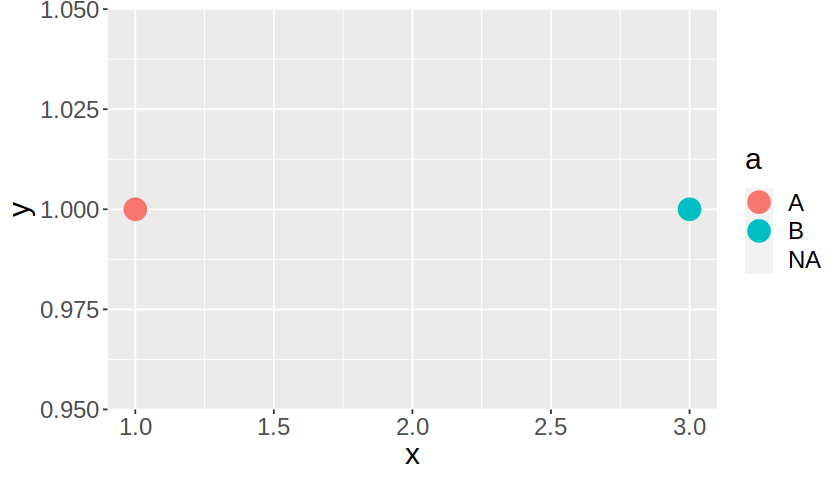

In [9]:
# na.value=NA hides missing values 

p1 + scale_color_discrete(na.value=NA)

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


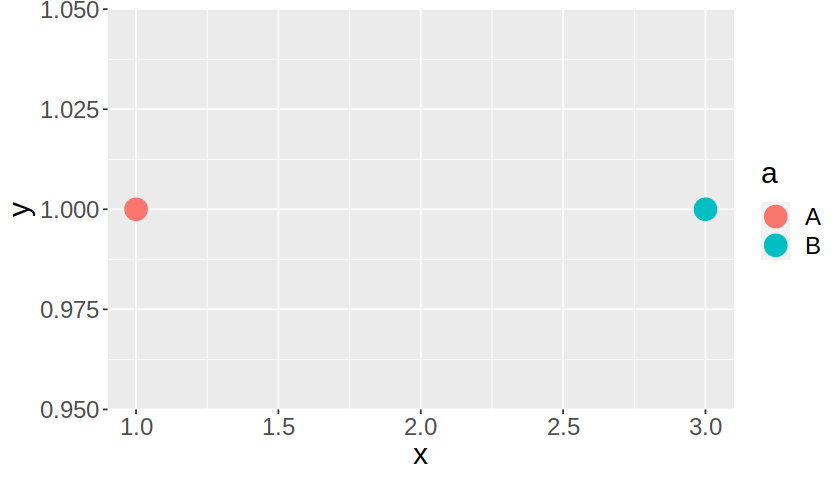

In [10]:
# with na.translate=F removes missing values from a discrete scale

p1 + scale_color_discrete(na.translate=FALSE)

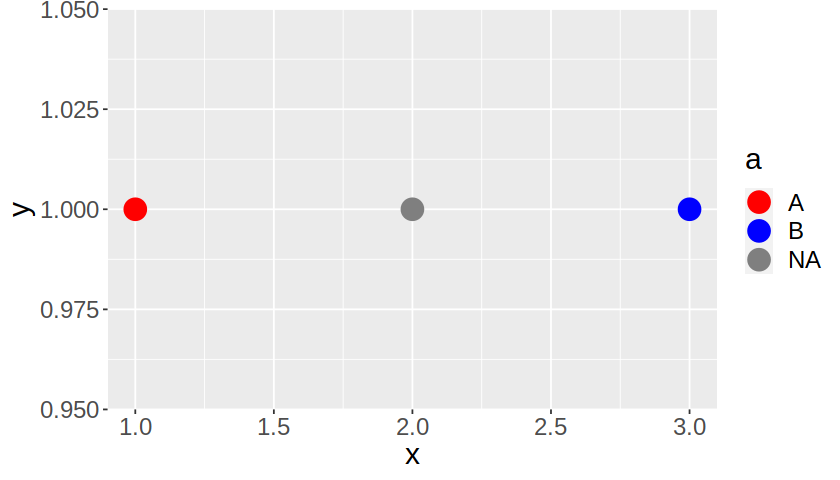

In [11]:
p1 + scale_color_manual(values = c("red", "blue", "green"))

#### Continuous Scale

In [12]:
set.seed(1)
df = data.frame(a=rnorm(50), b=rnorm(50), c=rep(1:5, 10))
df[sample(1:50, 10), ]$c = NA

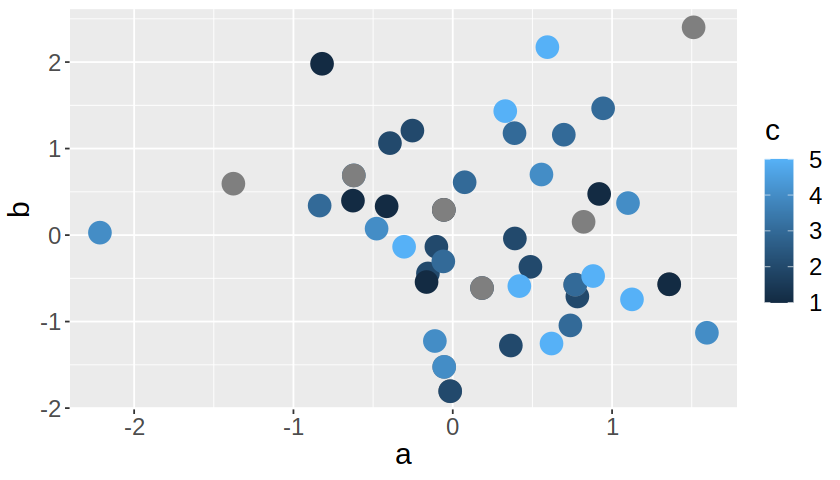

In [13]:
p2 <- ggplot(df) + geom_point(aes(x = a, y = b, col = c), size=6) + theme_stg
p2

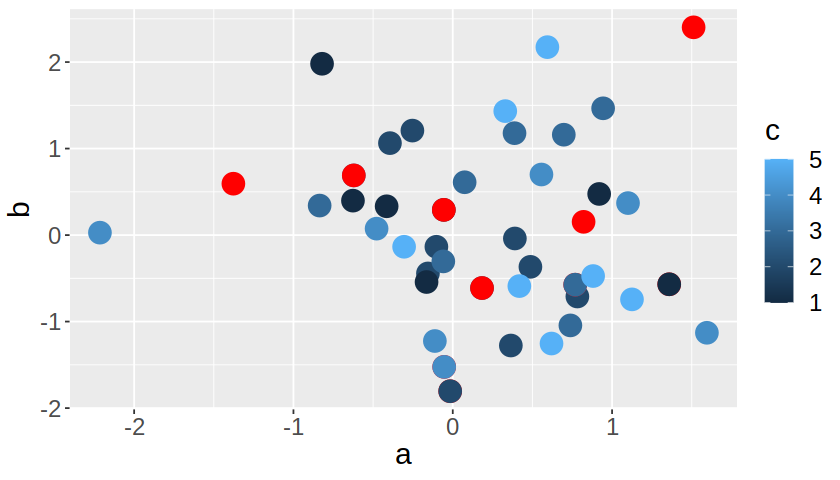

In [14]:
p2 + scale_color_continuous(na.value="red")

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


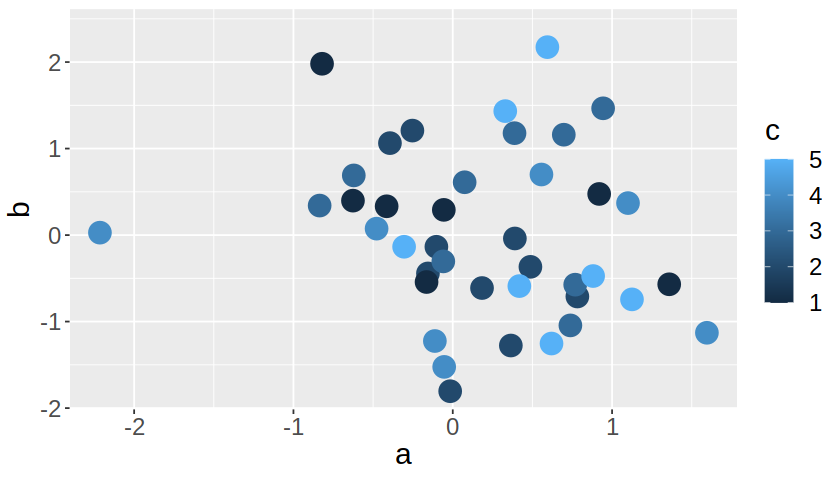

In [15]:
p2 + scale_color_continuous(na.value=NA)

In [16]:
p2 +  scale_color_brewer()

ERROR while rich displaying an object: Error: Continuous value supplied to discrete scale

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(print(ob

#### as discrete

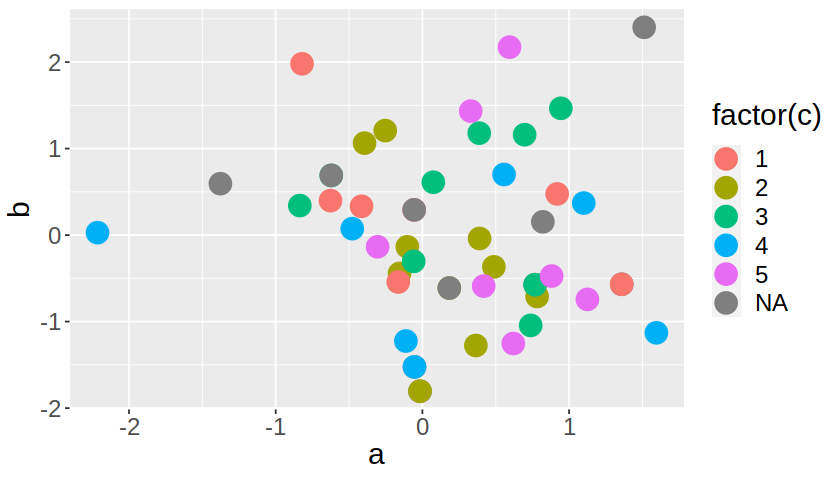

In [17]:
p3 <- ggplot(df) + geom_point(aes(x = a, y = b, col = factor(c)), size=6) + theme_stg
p3

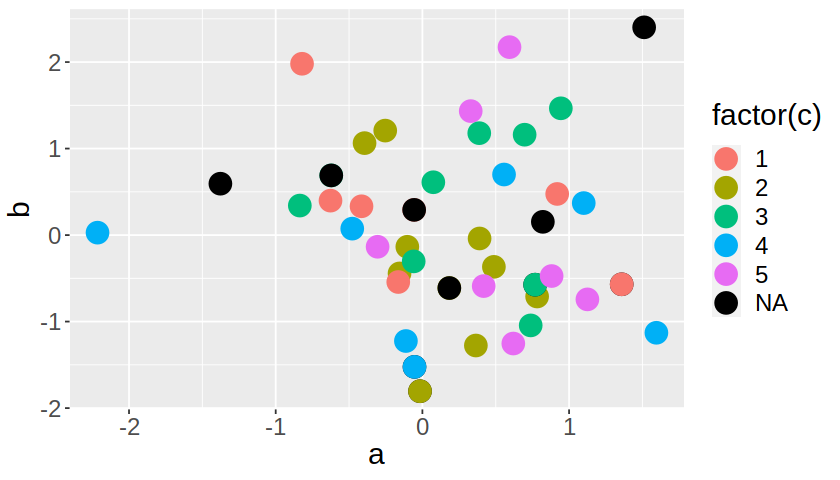

In [18]:
p3 + scale_color_discrete(na.value="black")

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


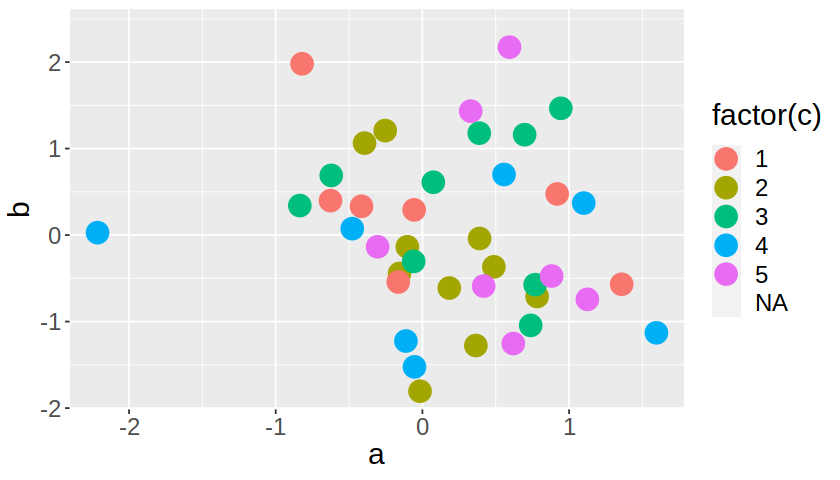

In [19]:
p3 + scale_color_discrete(na.value=NA)

#### Position Scale

In [20]:
set.seed(42)

bar_data <- data.frame(var1 = sample(c("A", "B", NA, "D"), 150, replace = TRUE),
                     var2 = sample(c("s", "i", "r", NA), 150, replace = TRUE))

bar_plot <- ggplot(bar_data) + aes(x = var1, fill = var2) + geom_bar() + theme_stg

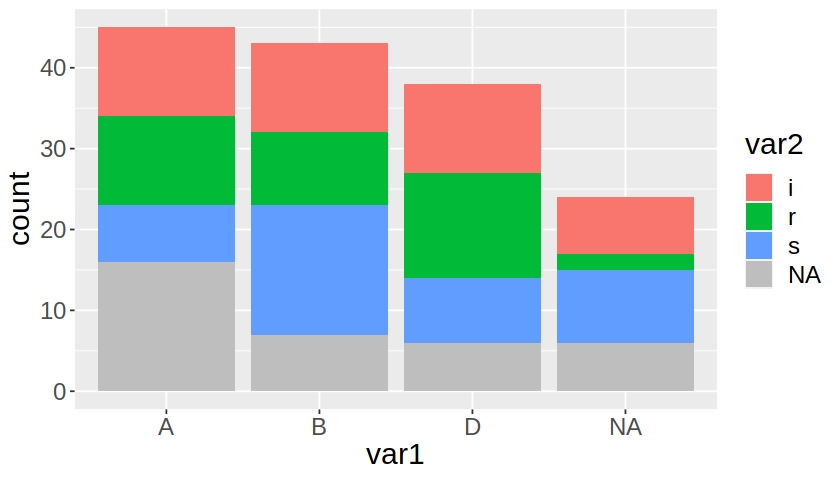

In [21]:
bar_plot + scale_fill_discrete(na.value = "gray") 

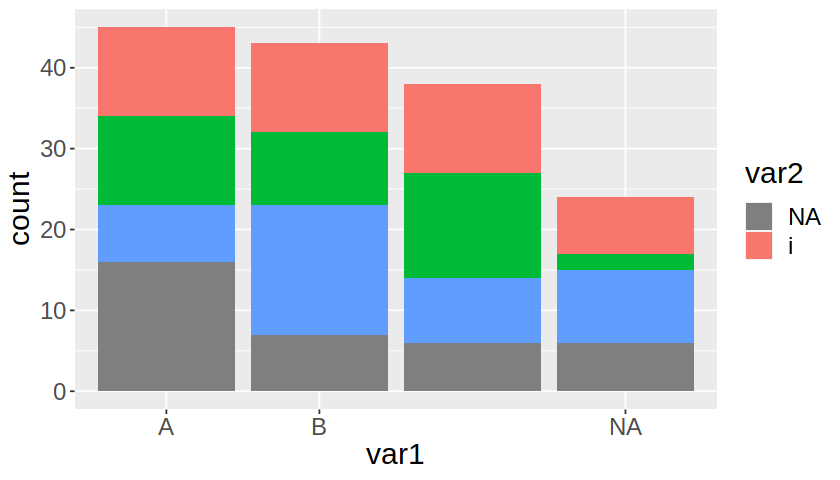

In [22]:
bar_plot + scale_x_discrete(breaks=c(NA,"B","A")) + scale_fill_discrete(breaks=c(NA,"i")) 

Warning message:
“Removed 38 rows containing non-finite values (`stat_count()`).”


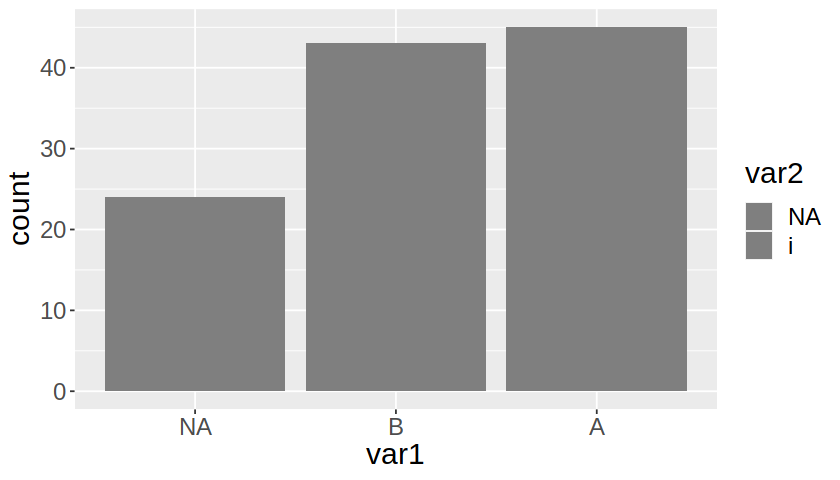

In [23]:
bar_plot + scale_x_discrete(limits=c(NA, "B","A")) + scale_fill_discrete(limits=c(NA,"i")) 

Warning message:
“Removed 38 rows containing non-finite values (`stat_count()`).”


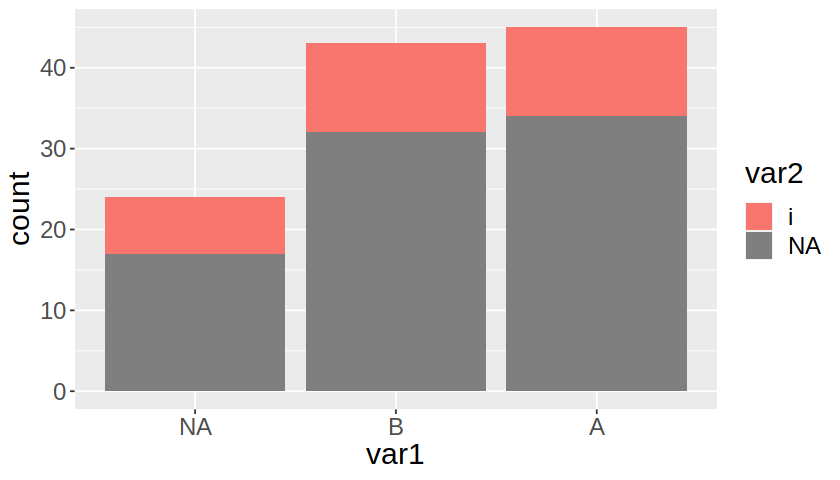

In [24]:
# fill: limits=["i", NA]
bar_plot + scale_x_discrete(limits=c(NA, "B","A")) + scale_fill_discrete(limits=c("i", NA)) 

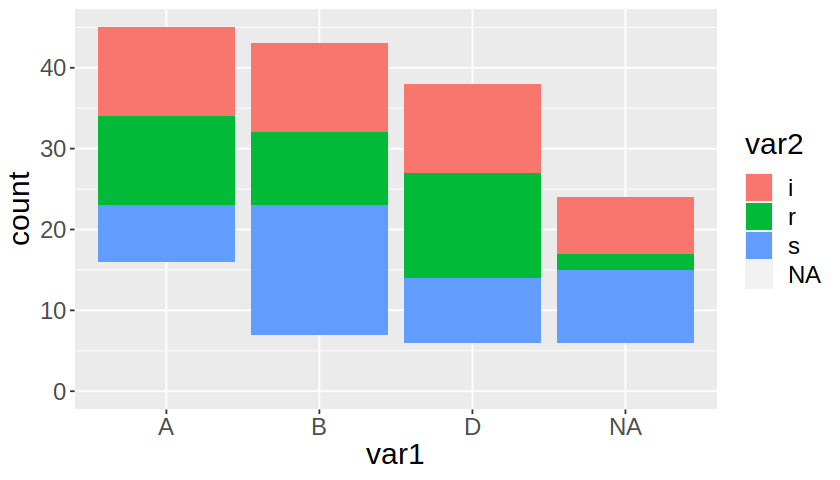

In [25]:
bar_plot +
  scale_x_discrete(na.value = NA) +
  scale_fill_discrete(na.value = NA)

Warning message:
“Removed 24 rows containing non-finite values (`stat_count()`).”


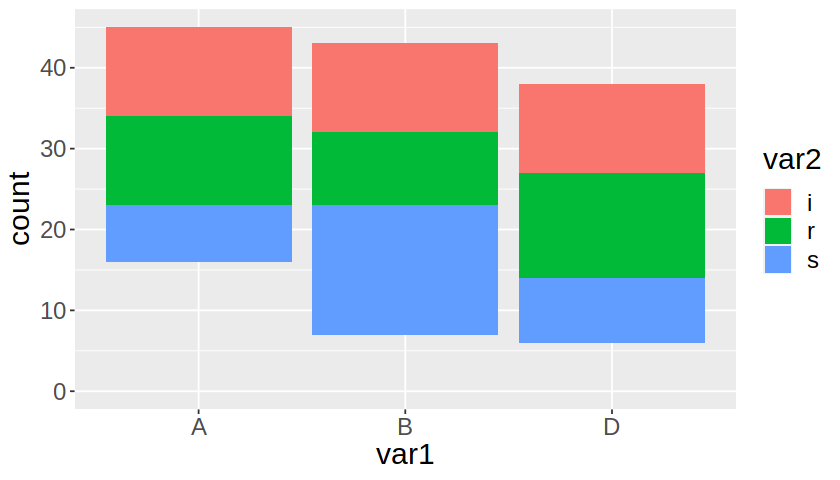

In [26]:
# na.translate = FALSE

bar_plot +
  scale_x_discrete(na.translate = FALSE) +
  scale_fill_discrete(na.translate = FALSE)


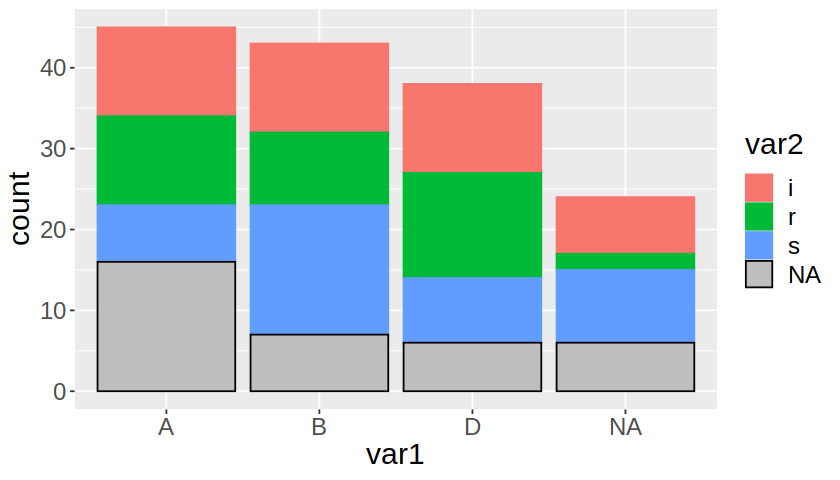

In [27]:
# color + fill

ggplot(bar_data) + aes(x = var1, fill = var2, color = var2) + geom_bar() + theme_stg + 
    scale_fill_discrete(na.value = "gray") + 
    scale_color_discrete(na.value = "black") 